In [42]:
pip install pandas numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.2 MB/s  0:00:06 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.0 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.8 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [161]:
df1 = pd.read_csv('player_log_round_1.csv')
df2 = pd.read_csv('player_log_round_2.csv')

# Combine (row-wise)
df = pd.concat([df1, df2], ignore_index=True)

print(df.shape)
df.head()

(1487854, 14)


,game_id,time,track,difficulty,kart_type,steer,accel,speed,brake,on_ground,x,y,z,energy
0,273686,75227495,abyss,easy,Emule,0.0,0,0.0,0,1,-29.6048,1.23725,-132.257,0.0
1,273686,75227512,abyss,easy,Emule,0.0,0,0.0,0,1,-29.6048,1.23657,-132.257,0.0
2,273686,75227513,abyss,easy,Emule,0.0,0,0.0,0,1,-29.6048,1.23657,-132.257,0.0
3,273686,75227531,abyss,easy,Emule,0.0,0,0.0,0,1,-29.6048,1.23657,-132.257,0.0
4,273686,75227531,abyss,easy,Emule,0.0,0,0.0,0,1,-29.6048,1.23657,-132.257,0.0


In [162]:

grouped = df.groupby('game_id')

results = []

for gid, g in grouped:
    off_ground_ratio = (g['on_ground'] == 0).mean() * 100
    
    speed = g['speed'].values
    drops = np.diff(speed)
    speed_drop_count = np.sum(drops < -5)

    
    steer = g['steer'].values
    steer_changes = np.sum(np.diff(np.sign(steer)) != 0)
    
    score = (
        0.4 * off_ground_ratio +
        0.4 * speed_drop_count +
        0.2 * steer_changes
    )
    
    results.append({
        'game_id': gid,
        'track': g['track'].iloc[0],
        'difficulty': g['difficulty'].iloc[0],
        'offGroundRatio': off_ground_ratio,
        'speedDropCount': speed_drop_count,
        'steerChanges': steer_changes,
        'FrustrationScore': score
    })

result_df = pd.DataFrame(results)

In [163]:
result_df

,game_id,track,difficulty,offGroundRatio,speedDropCount,steerChanges,FrustrationScore
0,102781,zengarden,easy,0.000000,1,93,19.000000
1,106334,volcano_island,easy,0.690058,0,249,50.076023
2,121576,black_forest,easy,0.367527,3,298,60.947011
3,121759,minigolf,medium,9.384647,4,117,28.753859
4,135048,hacienda,medium,6.357824,3,112,26.143129
...,...,...,...,...,...,...,...
164,982831,lighthouse,best,5.897772,2,79,18.959109
165,993222,sandtrack,hard,3.019997,1,110,23.607999
166,993609,abyss,medium,0.000000,1,125,25.400000
167,994982,gran_paradiso_island,best,0.000000,4,97,21.000000


In [172]:
highest_frustration = result_df.loc[result_df['FrustrationScore'].idxmax()]
print("Highest Frustration Score:")
print(highest_frustration, "\n")

lowest_frustration = result_df.loc[result_df['FrustrationScore'].idxmin()]
print("Lowest Frustration Score:")
print(lowest_frustration)


Highest Frustration Score:
game_id                   624077
track               black_forest
difficulty                  easy
offGroundRatio          1.661846
speedDropCount                 4
steerChanges                 304
FrustrationScore       63.064739
Name: 89, dtype: object 

Lowest Frustration Score:
game_id             509709
track                abyss
difficulty            easy
offGroundRatio         0.0
speedDropCount           0
steerChanges             0
FrustrationScore       0.0
Name: 69, dtype: object


In [165]:
result_df.to_csv('frustration_scores.csv', index=False)

In [168]:
df = pd.read_csv("frustration_scores.csv")

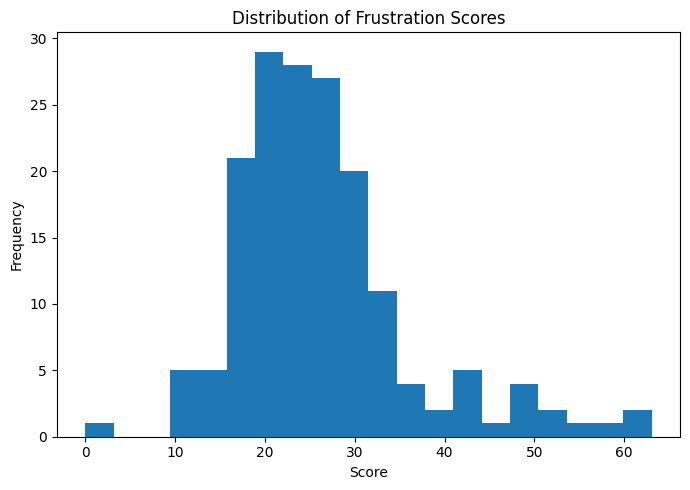

In [174]:
# DISTRIBUTION OF FRUSTRATION SCORES

plt.figure(figsize=(7, 5))
plt.hist(df['FrustrationScore'], bins=20)
plt.title("Distribution of Frustration Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

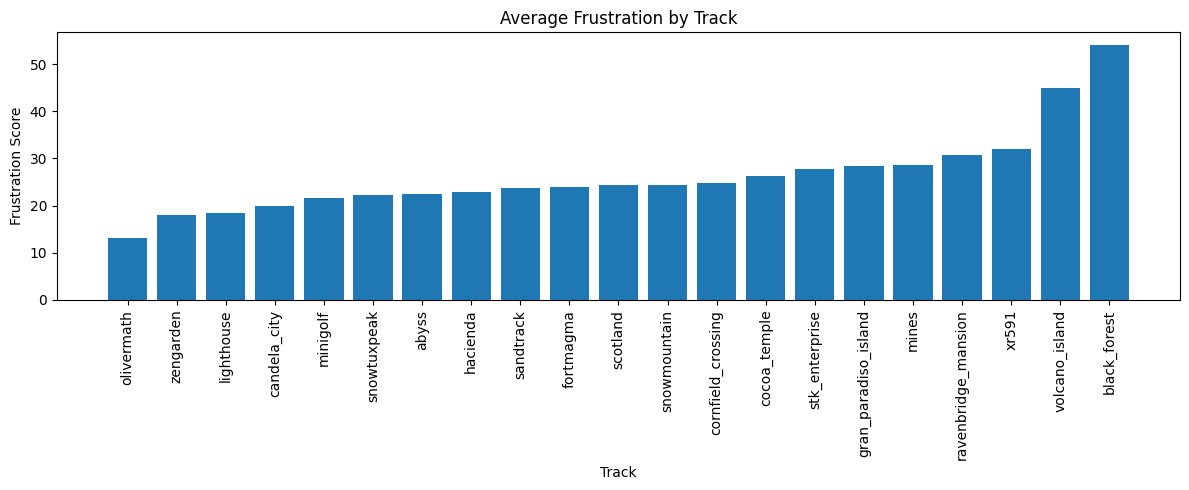

In [171]:
# 2. AVERAGE FRUSTRATION BY TRACK

track_mean = df.groupby('track')['FrustrationScore'].mean().sort_values()

plt.figure(figsize=(12, 5))
plt.bar(track_mean.index, track_mean.values)
plt.xticks(rotation=90)
plt.title("Average Frustration by Track")
plt.ylabel("Frustration Score")
plt.xlabel("Track")
plt.tight_layout()
plt.show()